![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [60]:
# QuantBook Analysis Tool 
# For more information see [https://www.quantconnect.com/docs/research/overview]
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import api as smg

qb = QuantBook()
start_time = datetime(2020, 1, 5) # start datetime for history call
end_time = datetime(2020, 12, 3) # end datetime for history call

In [61]:
    #Dickey-Fuller test stolen from https://www.hackdeploy.com/augmented-dickey-fuller-test-in-python/
    def ADF_Stationarity_Test(timeseries, significance_level=0.05, printResults = True):
        is_stationary = None
        
        adf_test = adfuller(timeseries, autolag='AIC')
        pValue = adf_test[1]
        
        if (pValue<significance_level):
            is_stationary = True
        else:
            is_stationary = False
        
        if printResults:
            dfResults = pd.Series(adf_test[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adf_test[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)
            print('Is it stationary? '+str(is_stationary))
        else:
            return is_stationary

symbol     time               
USDCAD 8G  2020-01-05 19:00:00    1.298950
           2020-01-06 19:00:00    1.296420
           2020-01-07 19:00:00    1.300135
           2020-01-08 19:00:00    1.303625
           2020-01-09 19:00:00    1.306320
Name: close, dtype: float64
symbol     time               
USDCAD 8G  2020-11-27 19:00:00    1.29905
           2020-11-29 19:00:00    1.29836
           2020-11-30 19:00:00    1.29914
           2020-12-01 19:00:00    1.29338
           2020-12-02 19:00:00    1.29174
Name: close, dtype: float64
286


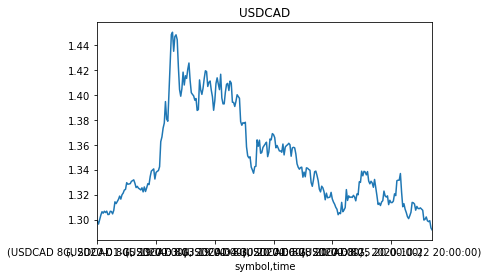

In [62]:
forex = qb.AddForex("USDCAD", Resolution.Daily, Market.Oanda).Symbol
forex_data = qb.History(forex, start_time, end_time)
print(forex_data['close'].head())
print(forex_data['close'].tail())
print(forex_data['close'].size)
forex_data['close'].plot(title='USDCAD')

symbol       time               
WTICOUSD 8I  2020-01-05 19:00:00    63.874
             2020-01-06 19:00:00    62.981
             2020-01-07 19:00:00    64.910
             2020-01-08 19:00:00    59.947
             2020-01-09 19:00:00    59.541
Name: close, dtype: float64
symbol       time               
WTICOUSD 8I  2020-11-27 19:00:00    45.335
             2020-11-29 19:00:00    44.979
             2020-11-30 19:00:00    45.044
             2020-12-01 19:00:00    44.009
             2020-12-02 19:00:00    44.737
Name: close, dtype: float64
286


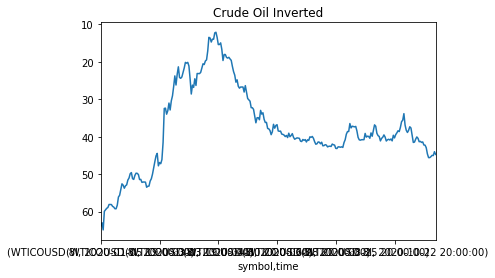

In [63]:
oil = qb.AddCfd("WTICOUSD", Resolution.Daily, Market.Oanda).Symbol
oil_data = qb.History(oil, start_time, end_time)
print(oil_data['close'].head())
print(oil_data['close'].tail())
print(oil_data['close'].size)
plt.gca().invert_yaxis()
oil_data['close'].plot(title='Crude Oil Inverted')


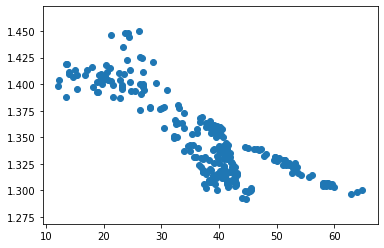

Correlation between time series is  -0.8329347502824384


In [64]:
plt.scatter(oil_data['close'].values, forex_data['close'].values)
plt.show()

corr = np.corrcoef(oil_data['close'].values, forex_data['close'])
print("Correlation between time series is ", corr[0][1])

In [65]:
print('Running Augmented Dickey-Fuller Test for Crude Oil...\n')
ADF_Stationarity_Test(oil_data['close'].values)

print('\n\n\n')

print('Running Augmented Dickey-Fuller Test for Forex...\n')
ADF_Stationarity_Test(forex_data['close'].values)

Running Augmented Dickey-Fuller Test for Crude Oil...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -2.210295
P-Value                   0.202530
# Lags Used               1.000000
# Observations Used     284.000000
Critical Value (1%)      -3.453587
Critical Value (5%)      -2.871771
Critical Value (10%)     -2.572222
dtype: float64
Is it stationary? False




Running Augmented Dickey-Fuller Test for Forex...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.383478
P-Value                   0.590171
# Lags Used               0.000000
# Observations Used     285.000000
Critical Value (1%)      -3.453505
Critical Value (5%)      -2.871735
Critical Value (10%)     -2.572202
dtype: float64
Is it stationary? False


In [66]:
# Note: Will import training data later.
"""
# We need to split the series into training and testing data
n_obs=80
X_train_oil, X_test_oil = oil_data['close'][0:-n_obs], oil_data['close'][-n_obs:]
print("Oil:")
print(X_train_oil.shape, X_test_oil.shape)

print()

# We need to split the series into training and testing data
n_obs=80
X_train_forex, X_test_forex = forex_data['close'][0:-n_obs], oil_data['close'][-n_obs:]
print("Cad")
print(X_train_forex.shape, X_test_forex.shape)

# Difference the training data to make it stationary

train_oil = X_train_oil.dropna().values.tolist()
train_forex = X_train_forex.dropna().values.tolist()

stationary_oil_data = pd.DataFrame(difference(train_oil))
stationary_forex_data = pd.DataFrame(difference(train_forex))

stationary_oil_data.plot(title='Stationary Crude Oil')
stationary_forex_data.plot(title='Stationary Forex')
"""
print('Wow')

Wow


In [67]:
# create a differenced series
def difference(series, interval=1):
    diff = []
    for i in range(interval, len(series)):
        value = series[i] - series[i - interval]
        diff.append(value)
    return diff

Making data stationary...



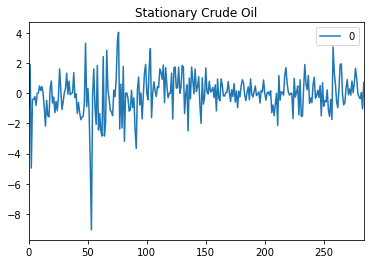

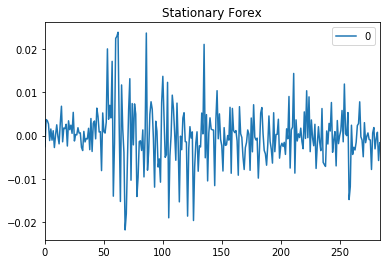

In [68]:
print('Making data stationary...\n')
stationary_oil_data = pd.DataFrame(difference(oil_data['close']))
stationary_forex_data = pd.DataFrame(difference(forex_data['close']))

stationary_oil_data.plot(title='Stationary Crude Oil')
stationary_forex_data.plot(title='Stationary Forex')

In [69]:
print('Running Augmented Dickey-Fuller Test for Stationary Crude Oil...\n')
ADF_Stationarity_Test(stationary_oil_data.values)

print('\n\n\n')

print('Running Augmented Dickey-Fuller Test for Stationary Crude Oil...\n')
ADF_Stationarity_Test(stationary_forex_data.values)

Running Augmented Dickey-Fuller Test for Stationary Crude Oil...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.495055e+01
P-Value                 1.282297e-27
# Lags Used             0.000000e+00
# Observations Used     2.840000e+02
Critical Value (1%)    -3.453587e+00
Critical Value (5%)    -2.871771e+00
Critical Value (10%)   -2.572222e+00
dtype: float64
Is it stationary? True




Running Augmented Dickey-Fuller Test for Stationary Crude Oil...

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.560780e+01
P-Value                 1.795538e-28
# Lags Used             0.000000e+00
# Observations Used     2.840000e+02
Critical Value (1%)    -3.453587e+00
Critical Value (5%)    -2.871771e+00
Critical Value (10%)   -2.572222e+00
dtype: float64
Is it stationary? True


In [70]:
# Testing for cointegration
print('Testing for Cointegration...\n')
statsmodels.tsa.stattools.coint(stationary_oil_data, stationary_forex_data, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

Testing for Cointegration...



(-14.918056392766912,
 1.2229445393417657e-26,
 array([-3.93541871, -3.35772903, -3.05941753]))

In [71]:
oil_cad = pd.DataFrame({'Oil': np.squeeze(stationary_oil_data),
                        'Cad': np.squeeze(stationary_forex_data)})

print('Stationary Oil vs Cad')
oil_cad.head()

Stationary Oil vs Cad


,Oil,Cad
0,-0.893,-0.002530
1,1.929,0.003715
2,-4.963,0.003490
3,-0.406,0.002695
4,-0.401,-0.001140


In [72]:
# https://medium.com/swlh/using-granger-causality-test-to-know-if-one-time-series-is-impacting-in-predicting-another-6285b9fd2d1c
print('Running Granger Causality Test...\n')
granger_test = grangercausalitytests(oil_cad, maxlag=15)

Running Granger Causality Test...


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4180  , p=0.2347  , df_denom=281, df_num=1
ssr based chi2 test:   chi2=1.4331  , p=0.2313  , df=1
likelihood ratio test: chi2=1.4295  , p=0.2318  , df=1
parameter F test:         F=1.4180  , p=0.2347  , df_denom=281, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4353  , p=0.2398  , df_denom=278, df_num=2
ssr based chi2 test:   chi2=2.9222  , p=0.2320  , df=2
likelihood ratio test: chi2=2.9072  , p=0.2337  , df=2
parameter F test:         F=1.4353  , p=0.2398  , df_denom=278, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8232  , p=0.1432  , df_denom=275, df_num=3
ssr based chi2 test:   chi2=5.6087  , p=0.1323  , df=3
likelihood ratio test: chi2=5.5537  , p=0.1355  , df=3
parameter F test:         F=1.8232  , p=0.1432  , df_denom=275, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F t

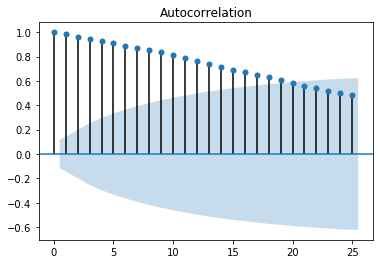

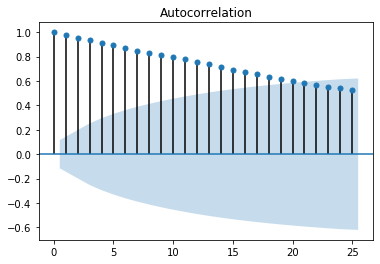

In [73]:
# Auto correlation test on raw data
auto_corr_oil = plot_acf(oil_data['close'].values)
auto_corr_oil.show()

auto_corr_cad = plot_acf(forex_data['close'].values)
auto_corr_cad.show()

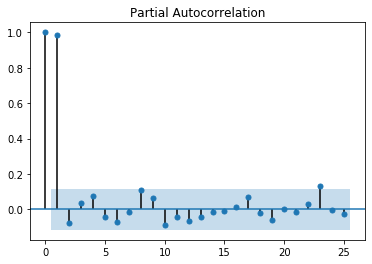

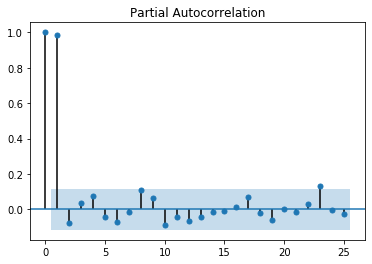

In [74]:
# Partial auto correlation test on raw data
cross_corr_oil = plot_pacf(forex_data['close'].values)
cross_corr_oil.show()

cross_corr_cad = plot_pacf(forex_data['close'].values)
cross_corr_cad.show()

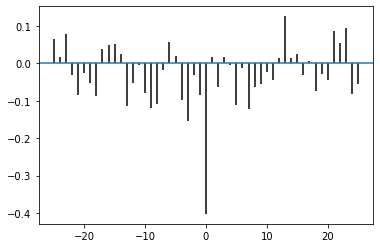

In [76]:
# Cross correlation test on stationary data
xcorr = plt.xcorr(oil_cad['Oil'].values, oil_cad['Cad'].values,  usevlines=True, maxlags=25)
plt.show()

In [85]:
"""
ARIMAX:
https://pyflux.readthedocs.io/en/latest/arimax.html
http://barnesanalytics.com/analyzing-multivariate-time-series-using-arimax-in-python-with-statsmodels
https://www.kaggle.com/viridisquotient/arimax

Arima:
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
"""

"""
Maybe start with 1 ar term.
1,0,0
"""

print('Wow')


model = statsmodels.tsa.arima_model.ARIMA(oil_cad['Oil'].values, order=(1, 1, 0))
res = model.fit()
print(res.summary())

Wow
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  284
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -530.089
Method:                       css-mle   S.D. of innovations              1.564
Date:                Fri, 18 Dec 2020   AIC                           1066.179
Time:                        03:28:42   BIC                           1077.126
Sample:                             1   HQIC                          1070.568
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.064      0.010      0.992      -0.124       0.125
ar.L1.D.y     -0.4591      0.053     -8.672      0.000      -0.563      -0.355
                                    Roots       